## To predict gold prices based on several other stock prices

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [9]:
correlation = gold_data.corr()

<AxesSubplot:>

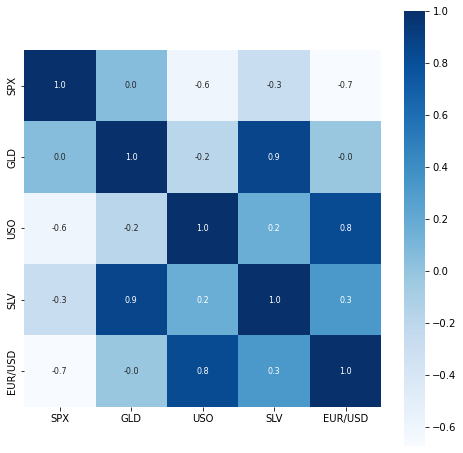

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [11]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\prath\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

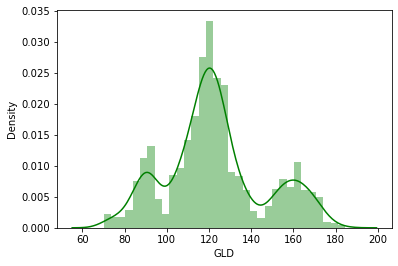

In [12]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

Splitting the Features and Target

In [13]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

 Model Training Linear Regression

In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(n_jobs=10)
lr.fit(X_train,Y_train)

LinearRegression(n_jobs=10)

In [18]:
lr_predict=lr.predict(X_test)
lr_predict

array([159.45290968,  81.50858067, 113.4868037 , 128.55153817,
       126.20403783, 141.31818338, 165.49416492, 124.44197659,
       113.95389904, 122.9965895 , 113.95492464, 174.89529849,
       132.66890174, 159.24793304, 118.8791679 , 122.14315717,
       150.37153054, 161.27175405, 152.2792036 , 162.19946709,
       145.88372183, 118.07669395, 180.21729122, 178.13331554,
       123.51701986,  98.82914322,  76.63486248, 119.38435511,
       113.85027665, 159.25706609,  93.76037617, 120.05334649,
        88.61086583, 114.28801659, 112.77954274, 144.19518102,
       118.78252489, 115.87334354, 144.06409553, 113.81864246,
       100.49676727,  89.42842238, 120.36720699, 110.47635305,
       146.4894628 , 119.30321261, 110.99311348, 111.3386287 ,
        96.48139076, 123.40842816,  79.51413425, 115.36111603,
       121.78896764, 114.55367722, 120.9074622 , 117.10612464,
       152.31198525, 182.7735091 , 196.73570503,  91.06670951,
       101.92097594,  87.48443506,  94.33158785, 119.17

In [19]:
print("Coefficents :",lr.coef_)
print("Feature Names:",lr.feature_names_in_)
print("Intercept:",lr.intercept_)

Coefficents : [ 6.82770004e-03 -2.56764053e-01  3.17723486e+00 -8.99975261e+00]
Feature Names: ['SPX' 'USO' 'SLV' 'EUR/USD']
Intercept: 67.45629268976191


In [20]:
error_score1 = metrics.r2_score(Y_test,lr_predict)
print("R squared error : ", error_score1)

R squared error :  0.8657886565869237


Model Training:
Random Forest Regressor

In [21]:
rf = RandomForestRegressor(n_estimators=100)

In [22]:
# training the model
rf.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [23]:
# prediction on Test Data
rf_predict= rf.predict(X_test)
rf_predict

array([168.30939956,  81.96269986, 116.34790062, 127.43150103,
       120.75080117, 154.75209712, 150.27119837, 126.19250053,
       117.45189872, 126.01490124, 116.80670093, 171.04350064,
       142.42879947, 167.78989805, 115.23230038, 117.81640027,
       138.93380295, 170.21580128, 159.32520261, 158.80819952,
       155.04380027, 125.24000027, 175.97519953, 156.99230303,
       125.34960016,  93.77649952,  77.48800014, 120.39900017,
       119.08589957, 167.51649987,  88.15290073, 125.30960003,
        91.04690066, 117.90520033, 121.14279944, 136.15270103,
       115.51520119, 115.4499005 , 146.92119981, 106.95390098,
       104.1881026 ,  87.17189801, 126.49170065, 118.06789971,
       153.01159852, 119.41970017, 108.41899987, 108.21889815,
        93.16010054, 127.15469783,  75.11950046, 113.67939918,
       121.41810039, 111.33969891, 118.74579891, 120.49569891,
       159.9423995 , 168.72840136, 146.8061964 ,  85.64279849,
        94.14150047,  86.73139823,  90.35540009, 119.21

In [24]:
print("Coefficents :",lr.coef_)
print("Feature Names:",lr.feature_names_in_)
print("Intercept:",lr.intercept_)

Coefficents : [ 6.82770004e-03 -2.56764053e-01  3.17723486e+00 -8.99975261e+00]
Feature Names: ['SPX' 'USO' 'SLV' 'EUR/USD']
Intercept: 67.45629268976191


In [25]:
# R squared error
error_score2= metrics.r2_score(Y_test, rf_predict)
print("R squared error : ", error_score2)

R squared error :  0.988936265176725


Desicion Tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train,Y_train)

DecisionTreeRegressor()

In [27]:
dt_predict=dt.predict(X_test)
dt_predict

array([168.970001,  81.360001, 114.769997, 127.779999, 121.730003,
       155.669998, 148.220001, 126.559998, 117.389999, 125.620003,
       117.410004, 174.580002, 141.919998, 167.179993, 115.849998,
       116.5     , 134.100006, 168.970001, 159.570007, 132.850006,
       155.360001, 125.699997, 177.210007, 157.339996, 125.459999,
        93.720001,  73.080002, 122.290001, 118.519997, 167.820007,
        88.330002, 124.790001,  91.330002, 118.639999, 121.449997,
       135.410004, 114.57    , 115.800003, 134.119995, 105.720001,
       104.370003,  87.239998, 127.610001, 118.360001, 157.779999,
       119.959999, 108.419998, 107.790001,  93.459999, 128.539993,
        72.510002, 113.260002, 120.110001, 110.809998, 118.519997,
       121.129997, 161.320007, 161.520004, 146.869995,  85.199997,
        93.800003,  86.879997,  91.980003, 119.800003, 126.139999,
       127.400002, 172.229996, 122.669998, 116.209999,  97.699997,
       169.820007, 142.509995, 132.490005, 120.910004, 122.879

In [28]:
error_score2= metrics.r2_score(Y_test, rf_predict)
print("R squared error : ", error_score2)

R squared error :  0.988936265176725


Lasso

In [29]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.5)
ls.fit(X_train,Y_train)

Lasso(alpha=0.5)

In [30]:
ls_pred=ls.predict(X_test)
ls_pred

array([158.97213402,  80.8477977 , 113.20241113, 128.27452288,
       125.53698361, 140.37146788, 165.92365712, 125.05891419,
       114.10847427, 123.50726263, 114.09796225, 175.20584722,
       132.61078662, 158.6381207 , 117.91182805, 121.77349122,
       150.30804054, 160.8219636 , 151.74508199, 162.13447452,
       145.49031482, 118.32580983, 180.61274534, 178.44078726,
       124.27020343,  99.73705083,  76.41025417, 120.17538828,
       114.10498091, 158.63507792,  93.97431335, 120.95675542,
        87.54309671, 113.96820966, 111.98865581, 143.8095864 ,
       117.94128783, 115.62891983, 143.48447944, 113.21600933,
       100.98925471,  89.02536275, 121.30781694, 110.17520703,
       145.73304818, 120.02687827, 110.88372775, 110.88142438,
        96.8385483 , 124.03013789,  78.67927572, 114.72335232,
       121.30512596, 114.12680807, 121.27826153, 117.1258755 ,
       152.27414639, 183.07245015, 196.75792585,  91.21405707,
       101.91693113,  87.01855997,  94.79888653, 119.73

In [31]:
ls.coef_

array([ 0.00737792, -0.29494232,  3.14349132, -0.        ])

In [32]:
ls.intercept_

56.88182834870325

In [33]:
error_score3= metrics.r2_score(Y_test, ls_pred)
print("R squared error : ", error_score3)

R squared error :  0.8642960340987913


In [34]:
from sklearn.linear_model import Ridge
rd=Ridge(alpha=0.5)
rd.fit(X_train,Y_train)

Ridge(alpha=0.5)

In [35]:
rd_pred=rd.predict(X_test)
rd_pred

array([159.43132496,  81.45666005, 113.46880497, 128.53624261,
       126.16427788, 141.26505489, 165.52904539, 124.47948551,
       113.96073722, 123.02646324, 113.96120369, 174.92577206,
       132.66740867, 159.21860871, 118.81986245, 122.1205721 ,
       150.37362898, 161.25236412, 152.25283028, 162.20386858,
       145.86452391, 118.09043602, 180.25392563, 178.1634116 ,
       123.56187568,  98.8803987 ,  76.60984995, 119.43112601,
       113.86355253, 159.22725045,  93.76936172, 120.10698508,
        88.53426917, 114.26789385, 112.73058588, 144.17656227,
       118.73074202, 115.85757849, 144.03363322, 113.78053057,
       100.52303903,  89.39284264, 120.42304887, 110.45653947,
       146.44869837, 119.34596127, 110.98498221, 111.30914191,
        96.49413118, 123.44509211,  79.45578052, 115.32082469,
       121.75985646, 114.52647469, 120.92939619, 117.10601851,
       152.31567663, 182.80426462, 196.75172447,  91.06552376,
       101.91372007,  87.44443497,  94.3561876 , 119.20

In [36]:
rd.coef_

array([ 6.86032341e-03, -2.59200491e-01,  3.17582919e+00, -8.45590474e+00])

In [37]:
rd.intercept_

66.80971885938398

In [38]:
error_score4= metrics.r2_score(Y_test, rd_pred)
print("R squared error : ", error_score4)

R squared error :  0.8657200384639034
